<a href="https://colab.research.google.com/github/architb1703/Toxic_Span/blob/archit/DataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 5.8MB/s 
     |████████████████████████████████| 1.1MB 41.0MB/s 
     |████████████████████████████████| 890kB 40.0MB/s 
     |████████████████████████████████| 2.9MB 38.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=f0736dd2fd2efc434f7eb08d641eb60510434791026ad610b91be5ed371d6810
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# from transformers import pipeline
import pandas as pd
import numpy as np
import pickle
from collections import Counter, OrderedDict
import string
import random
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Data Statistics**


In [ ]:
#Load data
train_path = '/content/drive/My Drive/BERT_Preprocess/train.pkl'

with open(train_path, 'rb') as f:
  train_data = pickle.load(f)
  f.close()

trial_path = '/content/drive/My Drive/BERT_Preprocess/trial.pkl'

with open(trial_path, 'rb') as f:
  trial_data = pickle.load(f)
  f.close()

In [ ]:
train_data = pd.concat([train_data, trial_data], ignore_index=True)

In [ ]:
#Build vocabulary of toxic tokens

toxic_tokens = []

for token_arr, target_arr in zip(train_data['token_final'], train_data['target_final']):
  for token, target in zip(token_arr, target_arr):
    if(target==1):
      toxic_tokens.append(token.lower())

t = Counter(toxic_tokens)

In [ ]:
stopword_dict = stopwords.words('english')

In [ ]:
lexicon = pd.read_csv('/content/drive/My Drive/EnglishShortened.csv')
valence_value = dict(zip(lexicon['Word'], lexicon['valence']))
lexicon_vocab = list(lexicon['Word'])

(array([3.739e+03, 1.140e+02, 4.700e+01, 2.100e+01, 1.800e+01, 1.300e+01,
        6.000e+00, 6.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

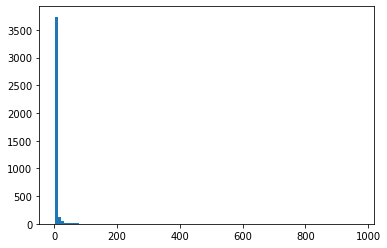

In [ ]:
import matplotlib.pyplot as plt
# len(t.values())
plt.hist(list(t.values()), bins=100)

In [ ]:
t['stupid']

971

In [ ]:
toxic_tokens = list(t.keys())

for i in toxic_tokens:
  if(i in stopword_dict):
    del t[i]
  elif(i in string.punctuation):
    del t[i]
  elif(t[i] < 5):
    del t[i]
  elif(len(i) <=2):
    del t[i]
  
  if((i in lexicon_vocab) and (valence_value[i]>6)):
    del t[i]
  elif(i not in lexicon_vocab):
    del t[i]

In [ ]:
train_data

,spans,text,target_final,span_final,token_final
0,"[7, 8, 9, 10]",Only a fool would not be against this presiden...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[(0, 4), (5, 6), (7, 11), (12, 17), (18, 21), ...","[Only, a, fool, would, not, be, against, this,..."
1,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57...",cops are dumbasses anyways and any male from u...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[(0, 4), (5, 8), (9, 18), (19, 26), (27, 30), ...","[cops, are, dumbasses, anyways, and, any, male..."
2,"[2, 3, 4, 5, 6, 7]",A stupid post by a troll. Thanks for outing y...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[(0, 1), (2, 8), (9, 13), (14, 16), (17, 18), ...","[A, stupid, post, by, a, troll, Thanks, for, o..."
3,"[5, 6, 7, 8, 9, 10, 11]","Most idiotic, heartless comment I think I've e...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[(0, 4), (5, 12), (12, 13), (14, 23), (24, 31)...","[Most, idiotic, ,, heartless, comment, I, thin..."
4,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","Some of you might have, but if you supported H...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[(0, 4), (5, 7), (8, 11), (12, 17), (18, 22), ...","[Some, of, you, might, have, ,, but, if, you, ..."
...,...,...,...,...,...
6346,"[684, 685, 686, 687, 688, 689, 703, 704, 705, ...","As for Clinton, it's well known why Putin want...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[(0, 2), (3, 6), (7, 14), (14, 15), (16, 18), ...","[As, for, Clinton, ,, it, 's, well, known, why..."
6347,"[46, 47, 48, 49, 98, 99, 100, 101, 102]",Because the author with this steaming pile of ...,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[(0, 7), (8, 11), (12, 18), (19, 23), (24, 28)...","[Because, the, author, with, this, steaming, p..."
6348,"[11, 12, 13, 14, 15, 16, 17, 18, 19]",Manifestly ludicrous.,"[0, 1]","[(0, 10), (11, 20)]","[Manifestly, ludicrous]"
6349,"[21, 22, 23, 24, 25, 26]",No need ban. Anyone stupid enough to go to N....,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[(0, 2), (3, 7), (8, 12), (14, 20), (21, 27), ...","[No, need, ban, Anyone, stupid, enough, to, go..."


# **Augmentation-1 : Duplicate Removal**

In [ ]:
#Creating a new data set by removing non-toxic duplicates from each sentence

LEN_DATA_ORIG = len(train_data['token_final'])
augmented_data_1 = []

for i in range(LEN_DATA_ORIG):
  new_sample = []
  for j,token in enumerate(train_data['token_final'][i]):
    if(train_data['target_final'][i][j]==1):
      new_sample.append(token)
    elif(token not in new_sample):
      new_sample.append(token)
  if(len(new_sample) == len(train_data['token_final'][i])):
    continue

  new_spans = []
  new_targets = []
  counter = 0
  prev = 0
  for j in range(len(train_data['token_final'][i])):
    if(train_data['token_final'][i][j] == new_sample[counter]):
      new_targets.append(train_data['target_final'][i][j])
      if(counter==0 or (new_sample[counter] in string.punctuation) or ((counter!=0 and j!=0) and (new_sample[counter]==train_data['token_final'][i][j] and train_data['span_final'][i][j][0]==train_data['span_final'][i][j-1][1]))):
        new_spans.append([prev, prev+len(new_sample[counter])])
        prev += len(new_sample[counter])
      else:
        new_spans.append([prev+1, prev+1+len(new_sample[counter])])
        prev += len(new_sample[counter])+1
      counter+=1    
    if(counter == len(new_sample)):
      break
  new_offsets = set([])
  prev = 0
  curr = 0
  for i in range(len(new_sample)):
    if(new_targets[i]==1):
      if(prev==1):
        new_offsets.add(curr)
      for k in range(new_spans[i][0], new_spans[i][1]):
        new_offsets.add(k)
    curr = new_spans[i][1]
    prev = new_targets[i]
  augmented_data_1.append([train_data['text'][i], sorted(list(new_offsets)), new_sample, new_spans, new_targets])

In [ ]:
len(augmented_data_1)

4476

In [ ]:
data_1 = pd.DataFrame(augmented_data_1, columns=['text', 'spans', 'token_final', 'span_final', 'target_final'])

In [ ]:
data_1

,text,spans,token_final,span_final,target_final
0,You can't believe a darn thing Trump says.,"[9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57...","[cops, are, dumbasses, anyways, and, any, male...","[[0, 4], [5, 8], [9, 18], [19, 26], [27, 30], ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,I was talking about the stupid comments from t...,"[5, 6, 7, 8, 9, 10, 11]","[Most, idiotic, ,, heartless, comment, I, thin...","[[0, 4], [5, 12], [12, 13], [14, 23], [24, 31]...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"In a sane world, he'd be tied to the glacis pl...",[],"[Well, stated, !, The, 'Donald, ', could, be, ...","[[0, 4], [5, 11], [11, 12], [13, 16], [17, 24]...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,no the author just added all his own bullshit ...,"[14, 15, 16, 17, 18, 24, 25, 26, 27, 28, 29]","[Ah, ,, to, be, fat, drunk, and, stupid]","[[0, 2], [2, 3], [4, 6], [7, 9], [10, 13], [14...","[0, 0, 0, 0, 0, 1, 0, 1]"
4,"Reposting for second time, as my previous two ...","[37, 38, 39, 40, 41, 42, 43, 44]","[no, the, author, just, added, all, his, own, ...","[[0, 2], [3, 6], [7, 13], [14, 18], [19, 24], ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...
4471,How the innocents suffered because of the wit...,"[35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 4...","[You, do, n't, have, to, wonder, Beav, ;, you,...","[[0, 3], [4, 6], [6, 9], [10, 14], [15, 17], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, ..."
4472,The motorcycle on shoulder lane is just plain ...,"[546, 547, 548, 549, 550, 551, 558, 559, 560, ...","[As, for, Clinton, ,, it, 's, well, known, why...","[[0, 2], [3, 6], [7, 14], [14, 15], [16, 18], ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4473,Darn! Why does it seem that lawmakers are con...,"[46, 47, 48, 49, 94, 95, 96, 97, 98]","[Because, the, author, with, this, steaming, p...","[[0, 7], [8, 11], [12, 18], [19, 23], [24, 28]...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
4474,"""Quebec is an almost pathologically alienated ...","[19, 20, 21, 22, 23, 24]","[No, need, ban, Anyone, stupid, enough, to, go...","[[0, 2], [3, 7], [8, 11], [12, 18], [19, 25], ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
pd.to_pickle(data_1, '/content/drive/My Drive/augmented_train_data_1.pkl')

# **Augmentation-2 : Random Masking**

In [ ]:
#Creating a new data set by randomly masking X% non-toxic tokens from the sentences

LEN_DATA_ORIG = len(train_data['token_final'])
augmented_data_2 = []

for i in range(LEN_DATA_ORIG):
  l = len(train_data['token_final'][i])
  if(l <= 10 or sum(train_data['target_final'][i])==len(train_data['token_final'][i])):
    continue
  new_sample = []
  new_spans = []
  new_targets = []
  new_offsets = []
  prev = 0
  curr = 0
  flag = 0
  threshold = random.uniform(0.1, 0.2)    #Setting the percentage hyperparameter for masking
  for j in range(l):
    if(train_data['target_final'][i][j]==1):
      new_sample.append(train_data['token_final'][i][j])
      new_targets.append(1)
      if(len(new_sample)==1 or (flag==1 and train_data['span_final'][i][j-1][1]==train_data['span_final'][i][j][0])):
        new_spans.append([curr, curr+len(train_data['token_final'][i][j])])
        curr += len(train_data['token_final'][i][j])
      else:
        curr += 1
        new_spans.append([curr, curr + len(train_data['token_final'][i][j])])
        curr += len(train_data['token_final'][i][j])
      if(j!=0 and prev==1):
        new_offsets.extend(k for k in range(new_spans[-2][1], new_spans[-1][0]))
      new_offsets.extend(k for k in range(new_spans[-1][0], new_spans[-1][1]))
      flag = 1
      prev = 1
    else:
      u = random.uniform(0,1)
      if(u<threshold):
        flag = 0
        prev = 0
        continue
      new_sample.append(train_data['token_final'][i][j])
      new_targets.append(0)
      if(len(new_sample)==1 or (flag==1 and train_data['span_final'][i][j-1][1]==train_data['span_final'][i][j][0])):
        new_spans.append([curr, curr+len(train_data['token_final'][i][j])])
        curr += len(train_data['token_final'][i][j])
      else:
        curr += 1
        new_spans.append([curr, curr + len(train_data['token_final'][i][j])])
        curr += len(train_data['token_final'][i][j])
      flag = 1
      prev = 0
  if(new_sample == train_data['token_final'][i]):
    continue
  augmented_data_2.append([train_data['text'][i], new_offsets, new_sample, new_spans, new_targets])

In [ ]:
len(augmented_data_2)

5498

In [ ]:
augmented_data_2[2]

["Most idiotic, heartless comment I think I've ever read. \n   You need help.",
 [0, 1, 2, 3, 4, 5, 6],
 ['idiotic', ',', 'heartless', 'comment', 'I', 'think', 'I', 'ever', 'help'],
 [[0, 7],
  [7, 8],
  [9, 18],
  [19, 26],
  [27, 28],
  [29, 34],
  [35, 36],
  [37, 41],
  [42, 46]],
 [1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
data_2 = pd.DataFrame(augmented_data_2, columns=['text', 'spans', 'token_final', 'span_final', 'target_final'])

In [ ]:
train_data = data_2   #To apply multiple augmentation methods

In [ ]:
pd.to_pickle(data_2, '/content/drive/My Drive/augmented_train_data_2.pkl')

# **Augmentation-3 : Random Swapping**

In [ ]:
#Creating new dataset using random swaps
#Swaps are only made between tokens with same label

LEN_DATA_ORIG = len(train_data['token_final'])
augmented_data_3 = []

for i in range(LEN_DATA_ORIG):

  new_sample = train_data['token_final'][i]
  new_targets = train_data['target_final'][i]
  l = len(new_sample)
  x = random.randint(10, 20)    #Setting hyperparameter for no. of random swaps
  n = l//x
  if(n==0):
    continue
  count = 0
  while(count < n):
    a = random.randint(0, l-1)
    b = random.randint(0, l-1)
    if((a==b) or train_data['target_final'][i][a]!=train_data['target_final'][i][b]):
      continue
    new_sample[a], new_sample[b] = new_sample[b], new_sample[a]
    count+=1
  augmented_data_3.append([new_sample, new_targets])

In [ ]:
data_3 = pd.DataFrame(augmented_data_3, columns=['token_final', 'target_final'])
pd.to_pickle(data_3, '/content/drive/My Drive/augmented_train_data_6.pkl')

In [ ]:
data_3

,token_final,target_final
0,"[Only, would, fool, a, not, be, against, this,...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"[pigjesus, dumbasses, anyways, and, any, male,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,"[banty, stated, !, The, 'Donald, ', could, be,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[while, ,, the, focus, is, standing, the, whit...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
4,"[another, Trump, sycophant, in, lying, boot, l...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
5008,"[Are, a, Woman, ?, a, ?, Then, why, are, you, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5009,"[this, a, moron, Alaska, is, own, enemy, on, t...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5010,"[But, Trump, 's, not, bluffing, what, go, scor...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5011,"[Ca, believe, the, this, of, knowledge, and, t...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
